In [1]:
#Fastai imports --> they include a lot of the things we need
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('/Users/chuanxu/fastai')
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import holidays
import geocoder

In [2]:
data = pd.read_csv('data/data_for_mapping_sensor')
test = pd.read_csv('data/test_for_mapping_sensor')
sensor = pd.read_csv('data/sensor_for_mapping_data')

## Map

In [7]:
import matplotlib.pyplot as plt

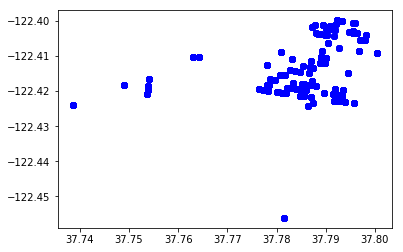

In [8]:
plt.plot(data.Street_From_lat, data.Street_From_lng, 'bo',
         data.Street_To_lat, data.Street_To_lng, 'bo')
plt.show()

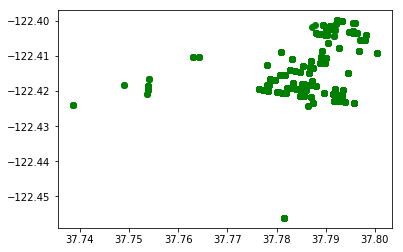

In [9]:
plt.plot(test.Street_From_lat, test.Street_From_lng, 'go',
         test.Street_To_lat, test.Street_To_lng, 'go')
plt.show()

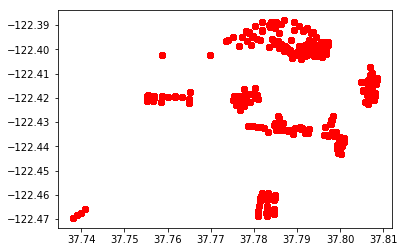

In [10]:
plt.plot(sensor.STREET_BLOCK_lat, sensor.STREET_BLOCK_lng, 'ro')
plt.show()

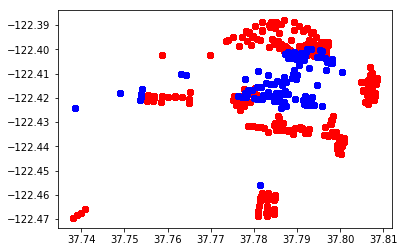

In [11]:
plt.plot(sensor.STREET_BLOCK_lat, sensor.STREET_BLOCK_lng, 'ro',
         data.Street_From_lat, data.Street_From_lng, 'bo',
         data.Street_To_lat, data.Street_To_lng, 'bo')
plt.show()

## Sensor group by street name

In [3]:
map_dict = {
'23rd Street':'23RD ST',
'Battery Street':'BATTERY ST',
'Bryant Street':'BRYANT ST',
'Bush Street':'BUSH ST',
'Columbus Avenue':'COLUMBUS AVE',
'Geary Street':'GEARY BLVD',
'Grove Street':'GROVE ST',
'Hyde Street':'HYDE ST',
'Jackson Street':'JACKSON ST',
'Jessie Street':'JESSIE ST',
'Jones Street':'JONES ST',
'Kearny Street':'KEARNY ST',
'Larkin Street':'LARKIN ST',
'Leavenworth Street':'LEAVENWORTH ST',
'Mason Street':'MASON ST',
'Mission Street':'MISSION ST',
'Montgomery Street':'MONTGOMERY ST',
'Pine Street':'PINE ST',
'Polk Street':'POLK ST',
'Post Street':'POST ST',
'Redwood Street':'REDWOOD ST',
'Stockton Street':'STOCKTON ST',
'Sutter Street':'SUTTER ST',
'Taylor Street':'TAYLOR ST',
'Van Ness Avenue':'VAN NESS AVE',
'Washington Street':'WASHINGTON ST'
}

In [4]:
data['STREET_NAME'] = data['Street'].map(lambda x:map_dict[x])
test['STREET_NAME'] = test['Street'].map(lambda x:map_dict[x])

## get time feature

In [5]:
def get_date_features(df, datetime):
    df[datetime] = pd.to_datetime(df[datetime])
    df['weekday'] = df[datetime].dt.weekday
    df['hour'] = df[datetime].dt.hour
    df['month'] = df[datetime].dt.month
    return df

In [6]:
data = get_date_features(data, 'datetime')
test = get_date_features(test, 'datetime')

In [7]:
sensor = get_date_features(sensor, 'Datetime')

## join data to sensor

In [8]:
data_drop = data.drop(['Street', 'Street_From_lat', 'Street_From_lng',
                       'Street_To_lat', 'Street_To_lng'], axis=1)
test_drop = test.drop(['Street', 'Street_From_lat', 'Street_From_lng',
                       'Street_To_lat', 'Street_To_lng'], axis=1)
sensor_drop = sensor.drop(['STREET_BLOCK_lat', 'STREET_BLOCK_lng'], axis=1)

In [9]:
data_merge = pd.merge(data_drop, sensor_drop, how='left')
test_merge = pd.merge(test_drop, sensor_drop, how='left')

In [10]:
data_merge.shape

(48205, 10)

In [11]:
test_merge.shape

(35763, 10)

In [12]:
data_merge['vacant_total'] = data_merge['TOTAL_VACANT_TIME'] / data_merge['TOTAL_TIME']
test_merge['vacant_total'] = test_merge['TOTAL_VACANT_TIME'] / test_merge['TOTAL_TIME']

In [13]:
data_merge.groupby('id').vacant_total.mean().to_pickle('data/data_vacant_total')
test_merge.groupby('id').vacant_total.mean().to_pickle('data/test_vacant_total')

In [14]:
data_merge

,datetime,id,STREET_NAME,weekday,hour,month,Datetime,TOTAL_TIME,TOTAL_OCCUPIED_TIME,TOTAL_VACANT_TIME,vacant_total
0,2014-01-07 16:19:00,1,MISSION ST,1,16,1,2013-01-08 16:00:00,97200.0,40296.0,24504.0,0.252099
1,2014-01-07 16:19:00,1,MISSION ST,1,16,1,2013-01-08 16:00:00,122400.0,0.0,0.0,0.000000
2,2014-01-07 16:19:00,1,MISSION ST,1,16,1,2013-01-08 16:00:00,46800.0,31572.0,15228.0,0.325385
3,2014-01-07 16:19:00,1,MISSION ST,1,16,1,2013-01-01 16:00:00,46800.0,21902.0,24898.0,0.532009
4,2014-01-07 16:19:00,1,MISSION ST,1,16,1,2013-01-15 16:00:00,46800.0,40244.0,6556.0,0.140085
5,2014-01-07 16:19:00,1,MISSION ST,1,16,1,2013-01-01 16:00:00,97200.0,39869.0,24931.0,0.256492
6,2014-01-07 16:19:00,1,MISSION ST,1,16,1,2013-01-15 16:00:00,97200.0,40243.0,24557.0,0.252644
7,2014-01-07 16:19:00,1,MISSION ST,1,16,1,2013-01-01 16:00:00,122400.0,0.0,0.0,0.000000
8,2014-01-07 16:19:00,1,MISSION ST,1,16,1,2013-01-15 16:00:00,122400.0,0.0,0.0,0.000000
9,2014-01-07 16:19:00,1,MISSION ST,1,16,1,2013-01-22 16:00:00,46800.0,27895.0,18905.0,0.403953
